In [1]:
%%capture
!pip install PDPbox==0.2.0

Cloning into 'PDPbox'...
remote: Enumerating objects: 1436, done.
remote: Total 1436 (delta 0), reused 0 (delta 0), pack-reused 1436
Receiving objects: 100% (1436/1436), 238.79 MiB | 2.38 MiB/s, done.
Resolving deltas: 100% (798/798), done.
Checking out files: 100% (79/79), done.
python: can't open file 'setup.py': [Errno 2] No such file or directory


In [1]:
import autosklearn.classification
import pandas as pd
from joblib import dump, load
import numpy as np
import glob
from pdpbox import pdp

/opt/conda/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [3]:
models = []
for model_path in glob.glob("model_3cv/model_run_*"):
    models.append(load(model_path))

In [4]:
bad_models = []
for model_path in glob.glob("model_3cv/bad_auto_model_run_*"):
    bad_models.append(load(model_path))

In [7]:
numeric_conv_cols = ['age', 'age_o', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',\
                    'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', \
                    'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', \
                    'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', \
                    'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', \
                     'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', \
                     'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', \
                     'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', \
                    'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'gender']

In [8]:
df = pd.read_csv("speeddating_reduced.csv")
X= df[numeric_conv_cols].fillna(-1)
y= df['match']

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


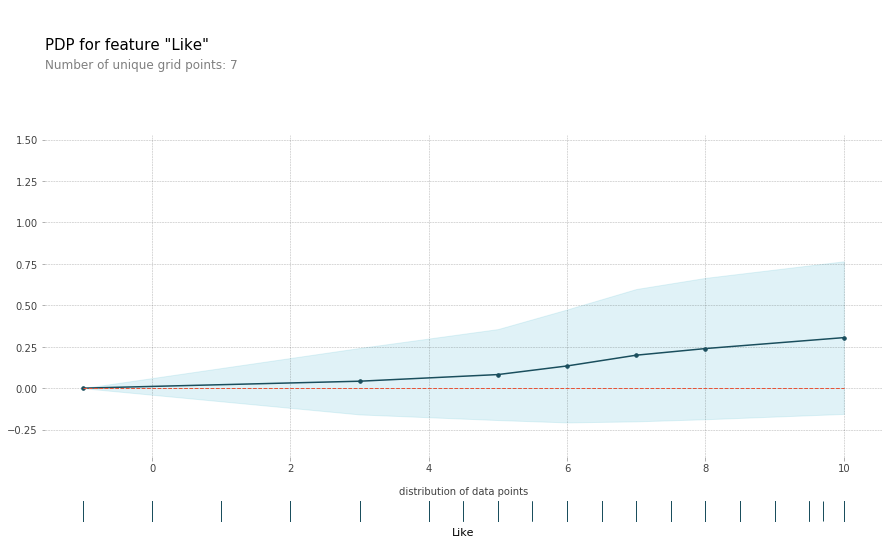

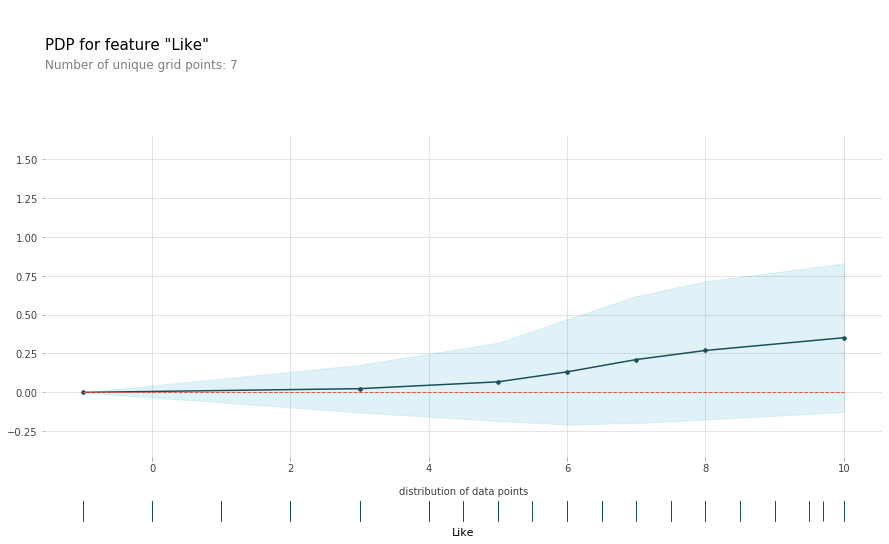

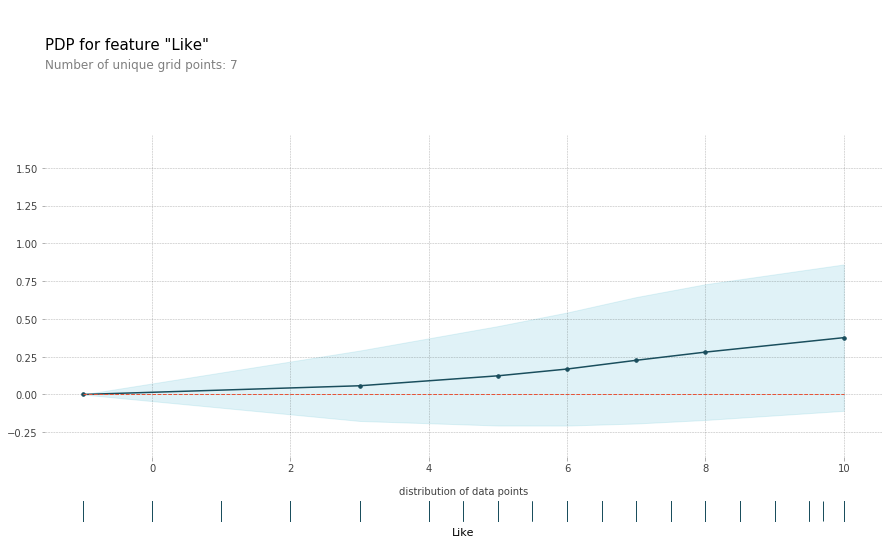

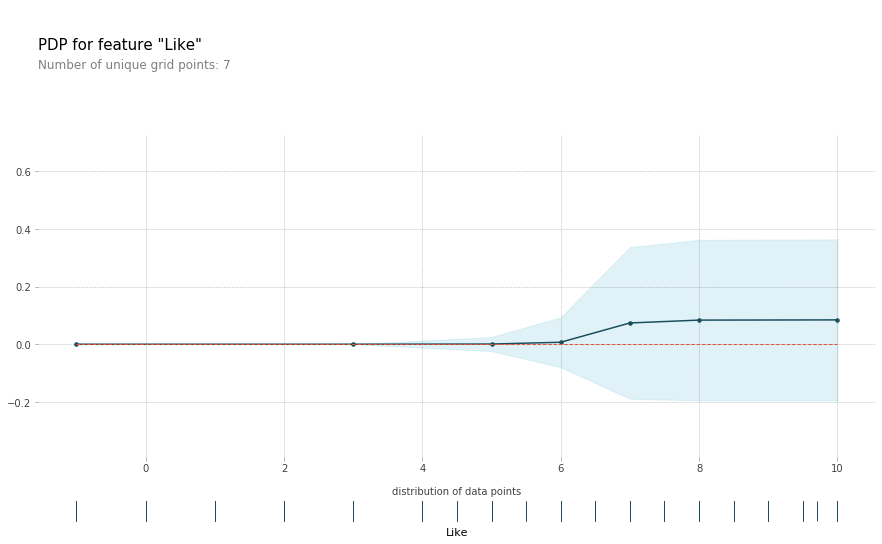

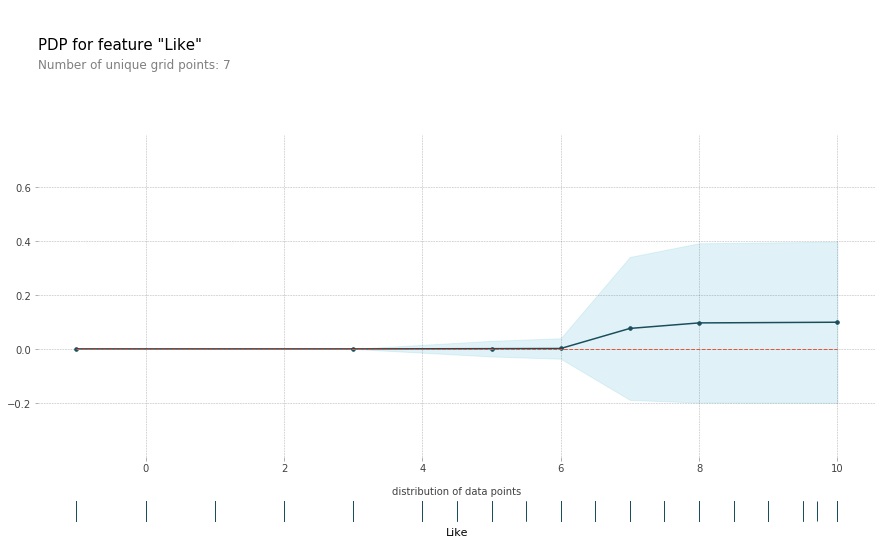

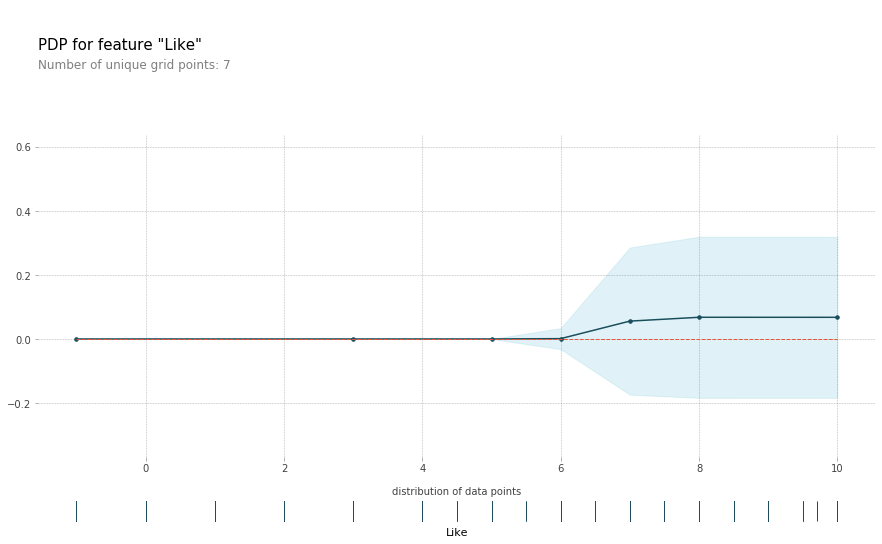

In [7]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='like', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'Like', plot_pts_dist=True)

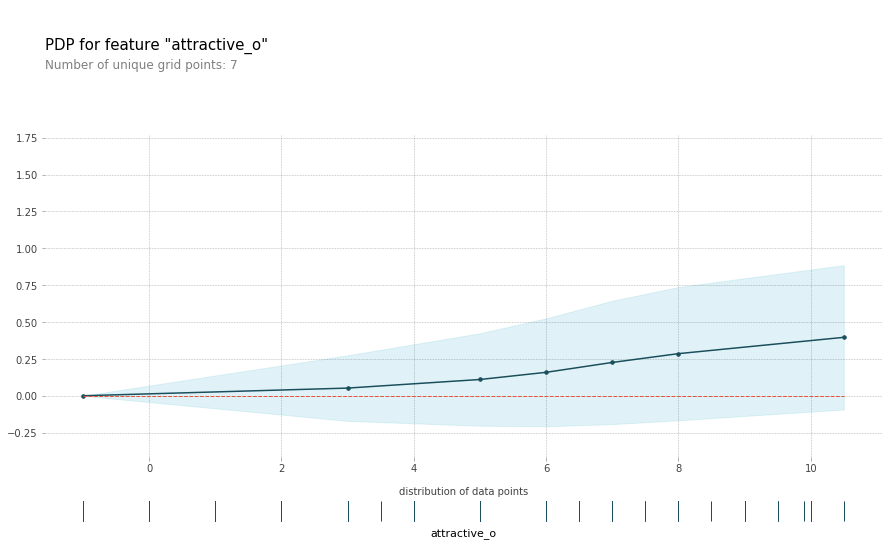

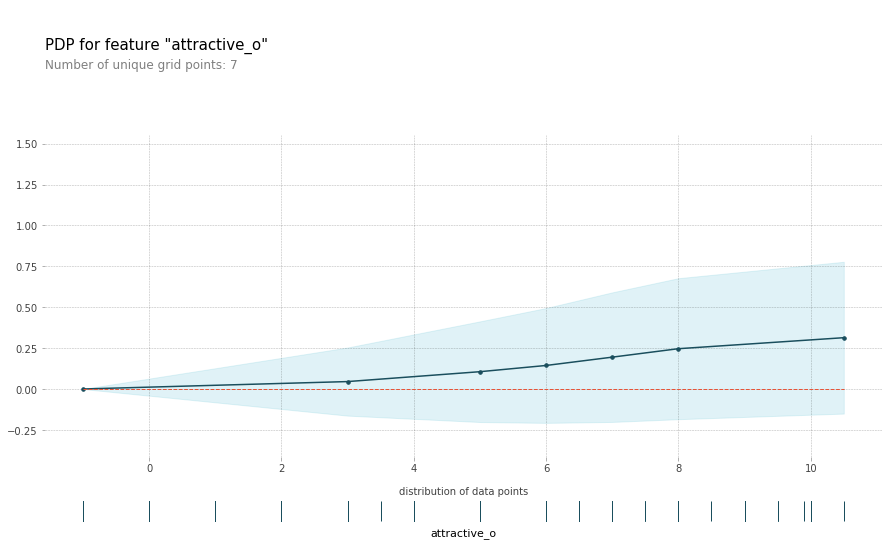

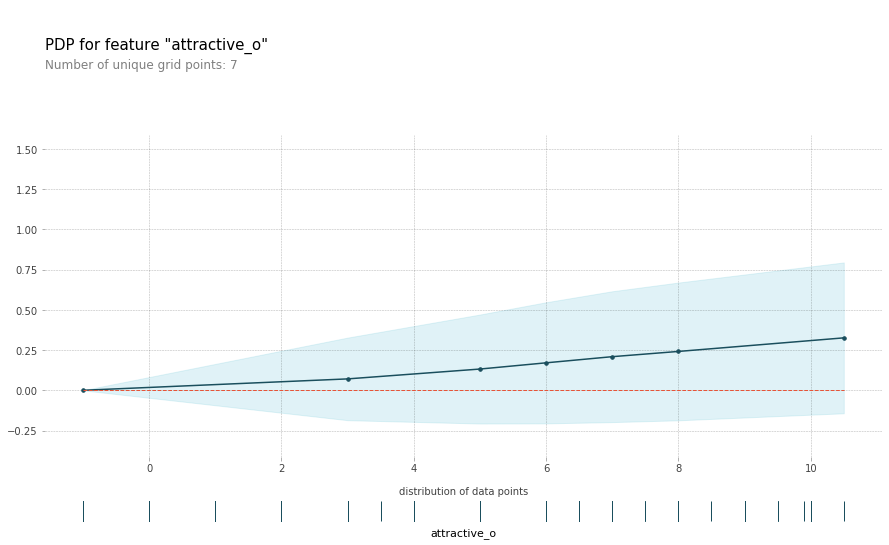

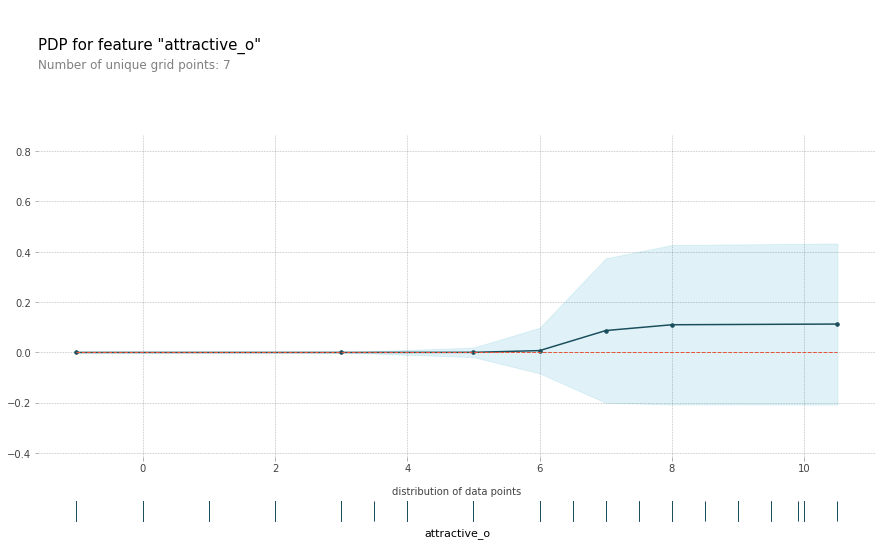

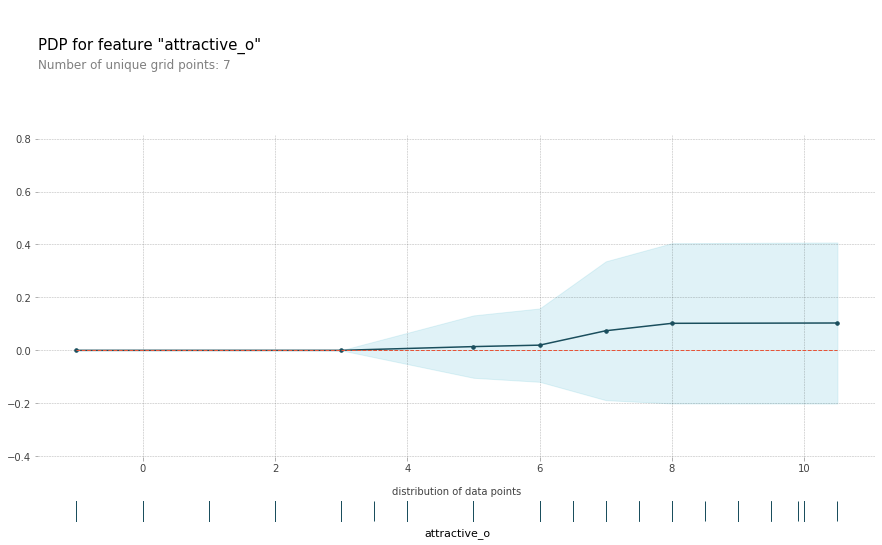

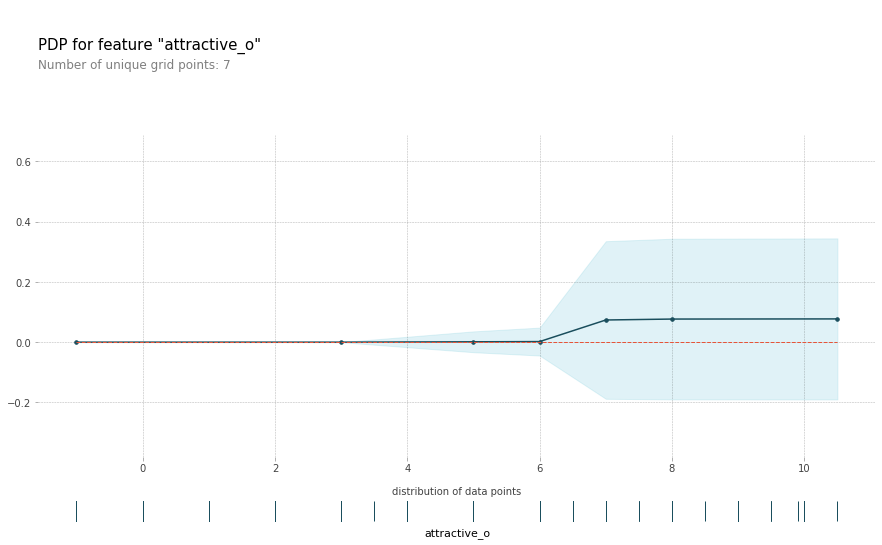

In [8]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='attractive_o', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'attractive_o', plot_pts_dist=True)

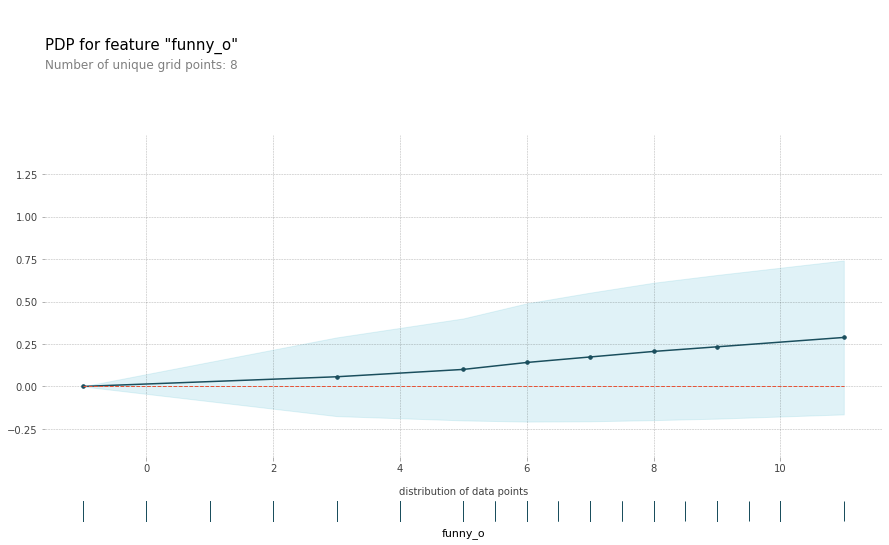

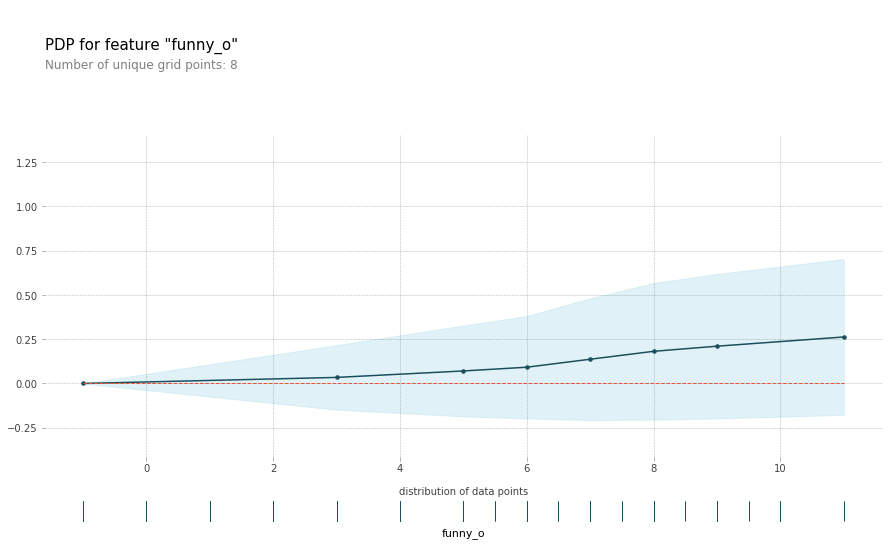

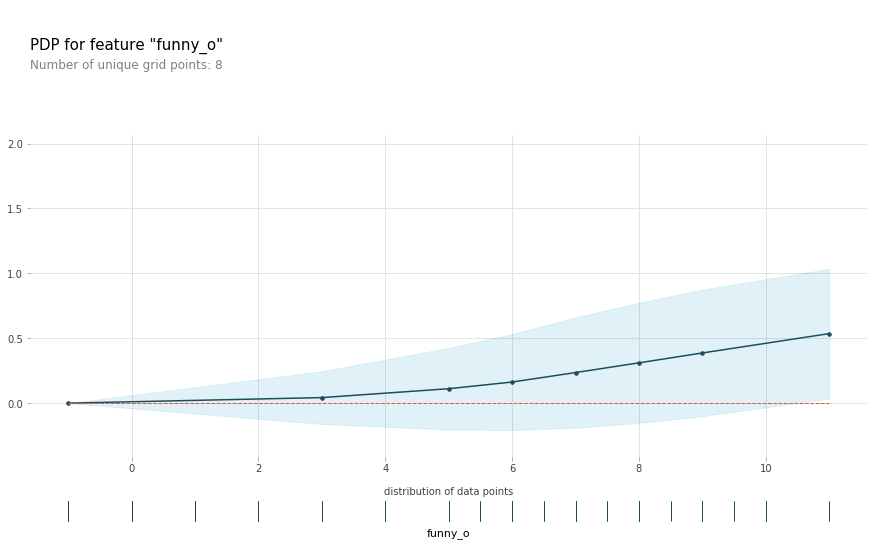

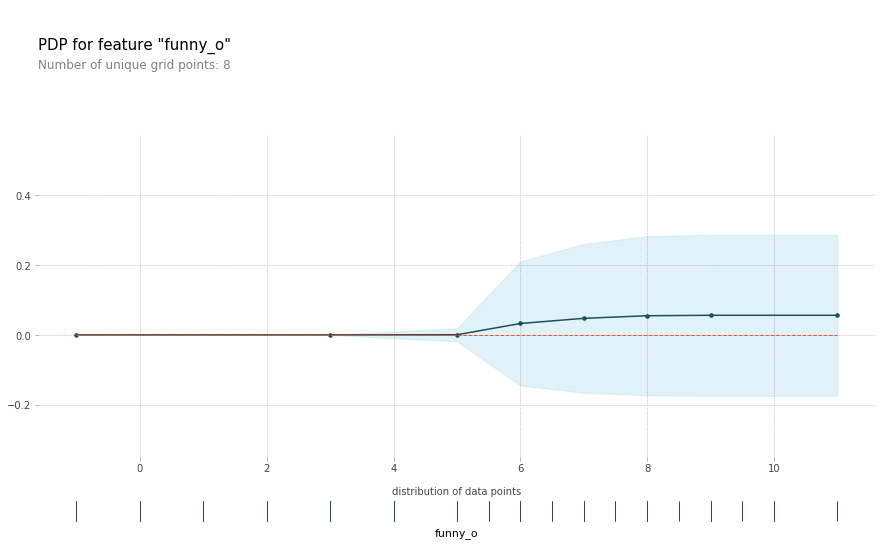

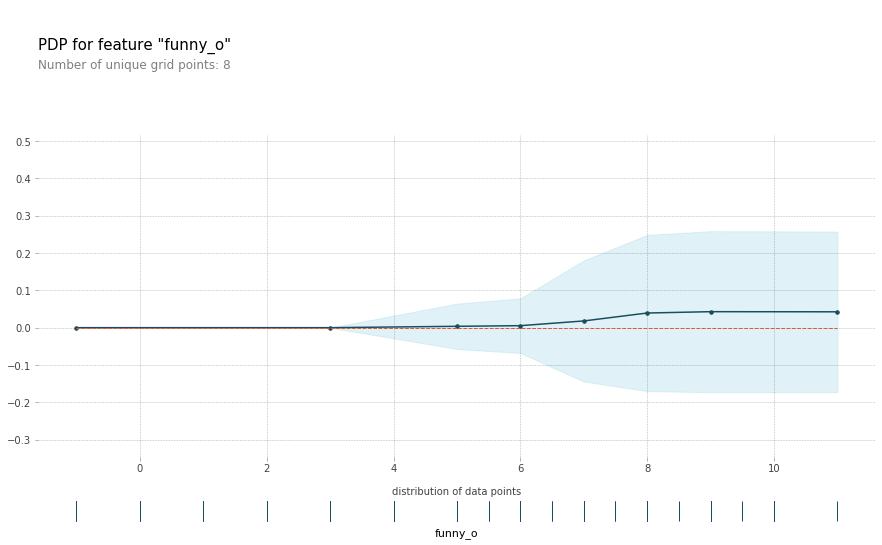

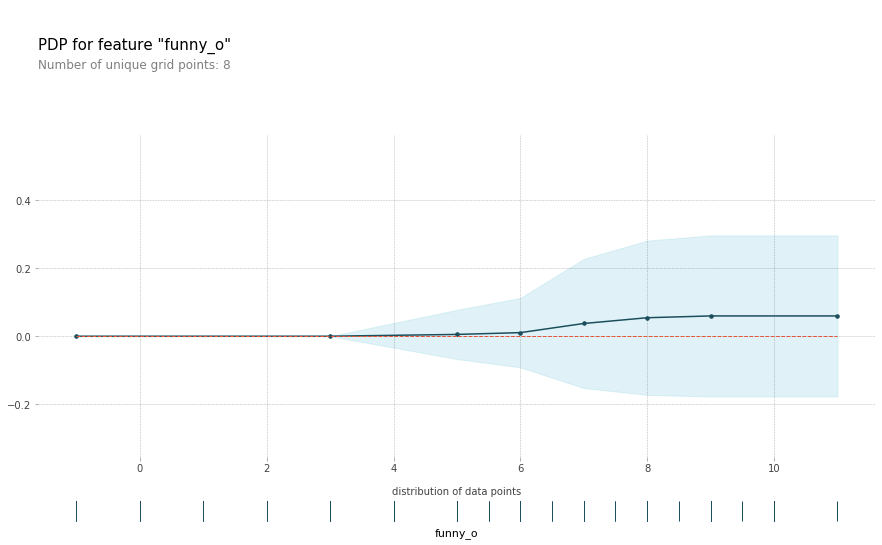

In [9]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='funny_o', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'funny_o', plot_pts_dist=True)

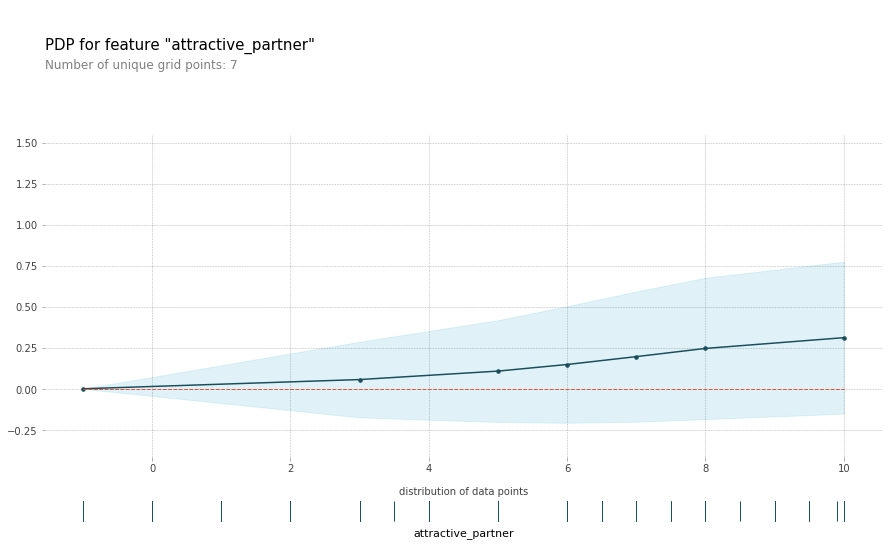

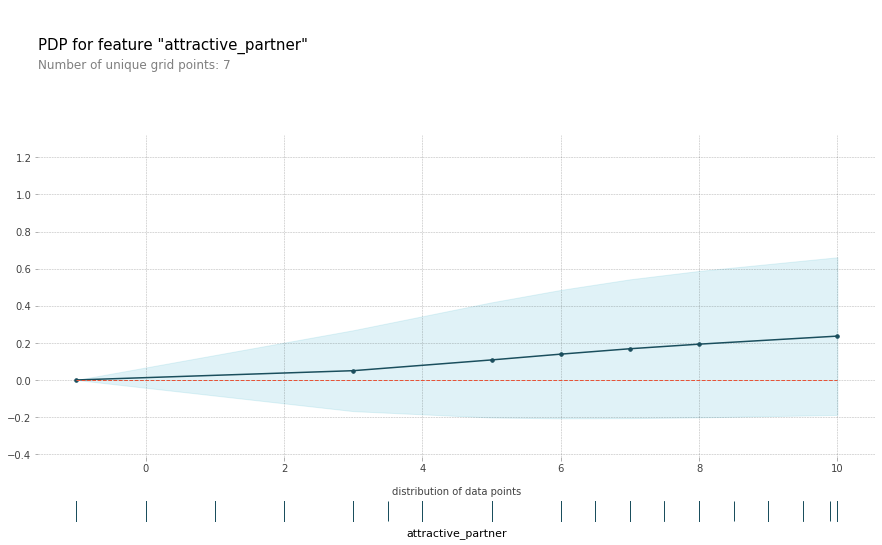

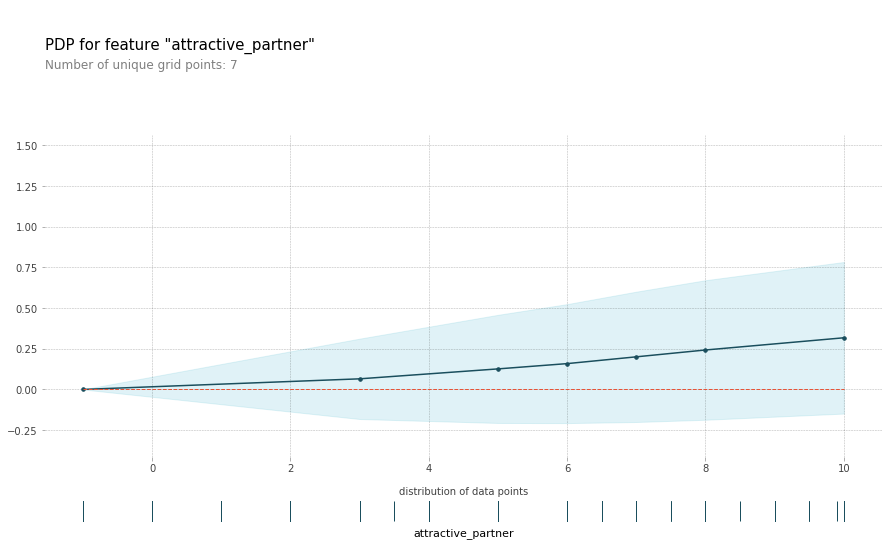

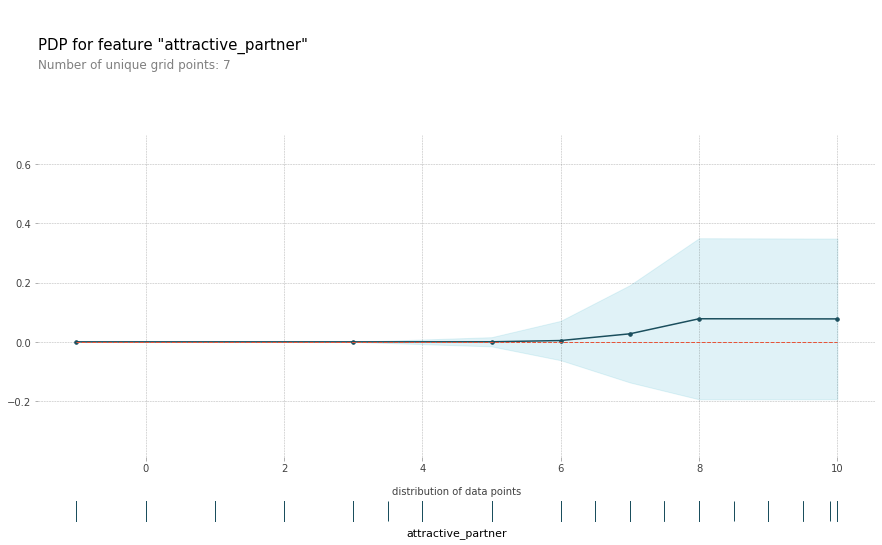

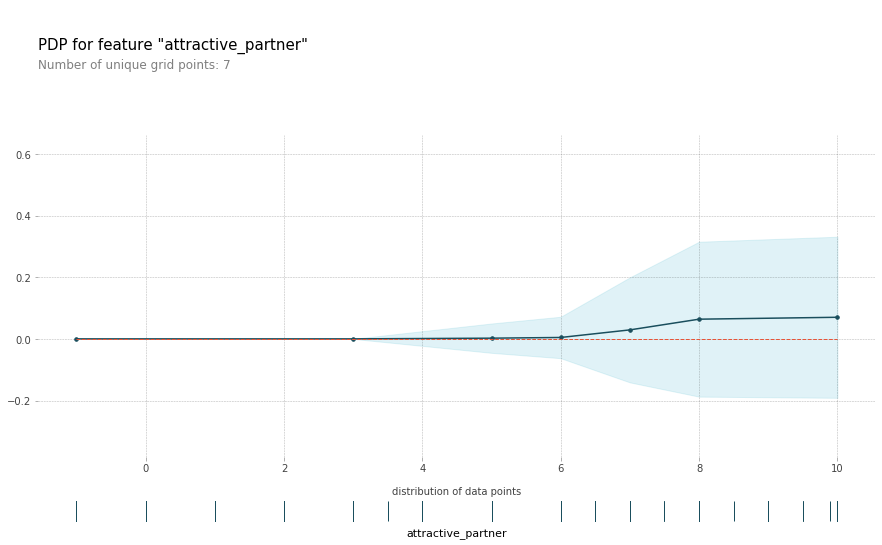

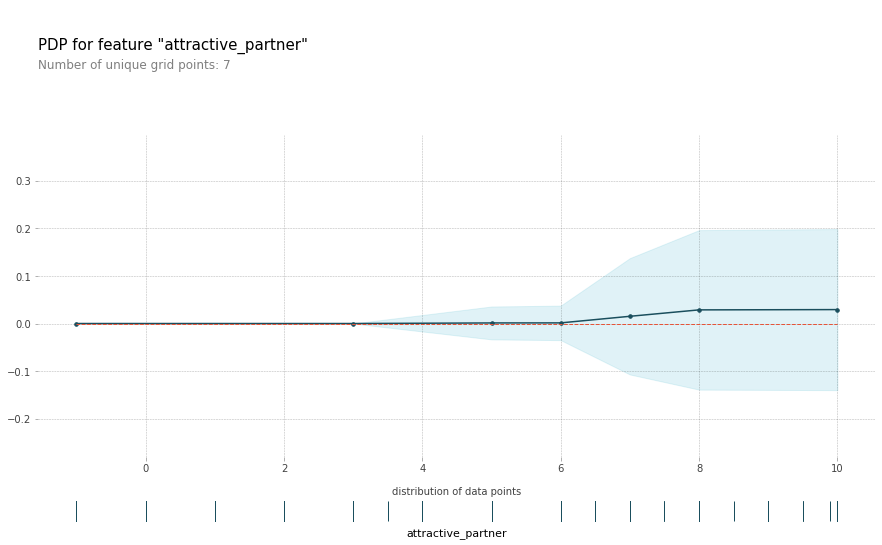

In [10]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='attractive_partner', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'attractive_partner', plot_pts_dist=True)

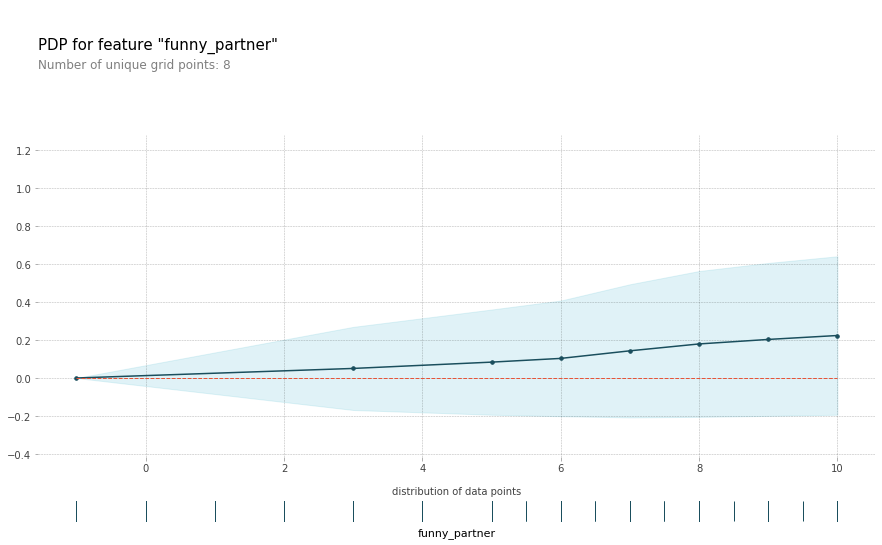

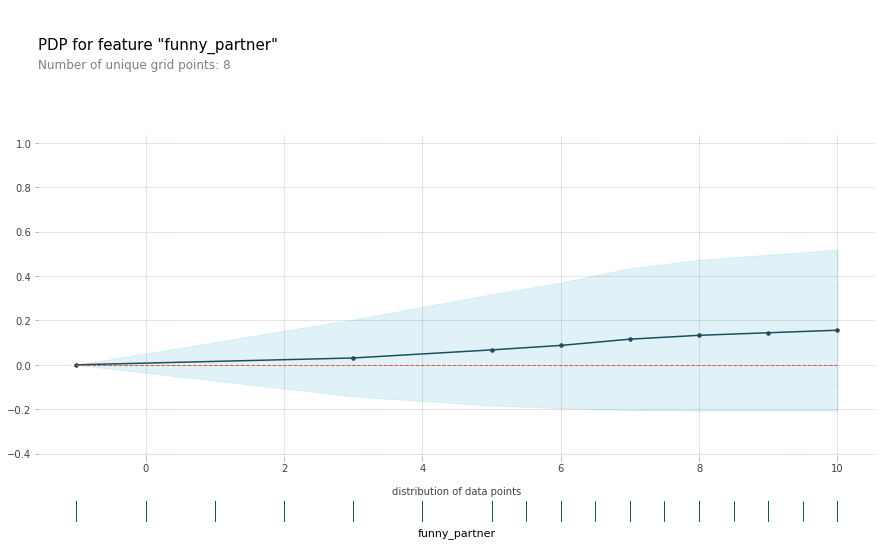

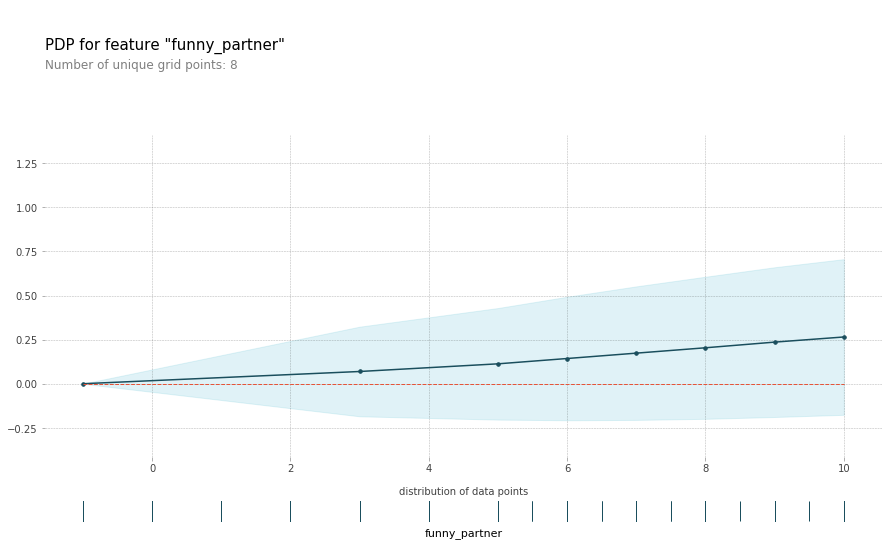

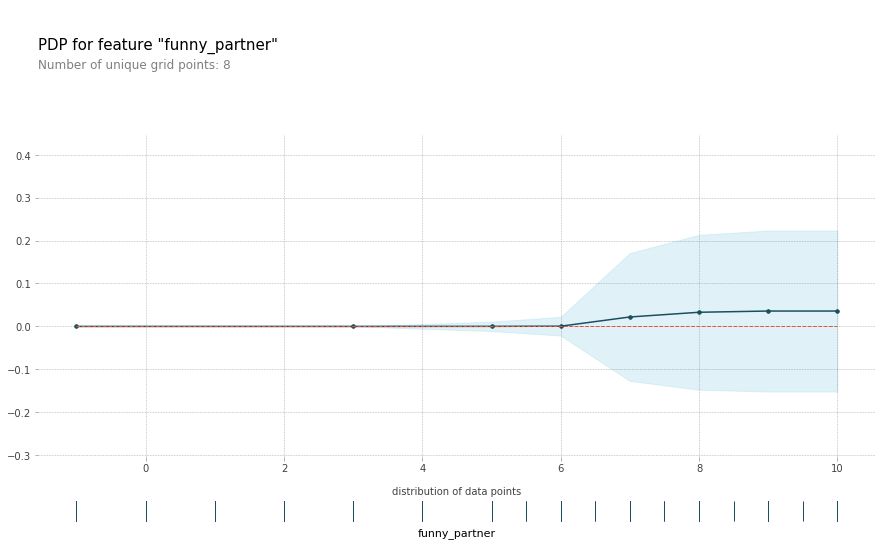

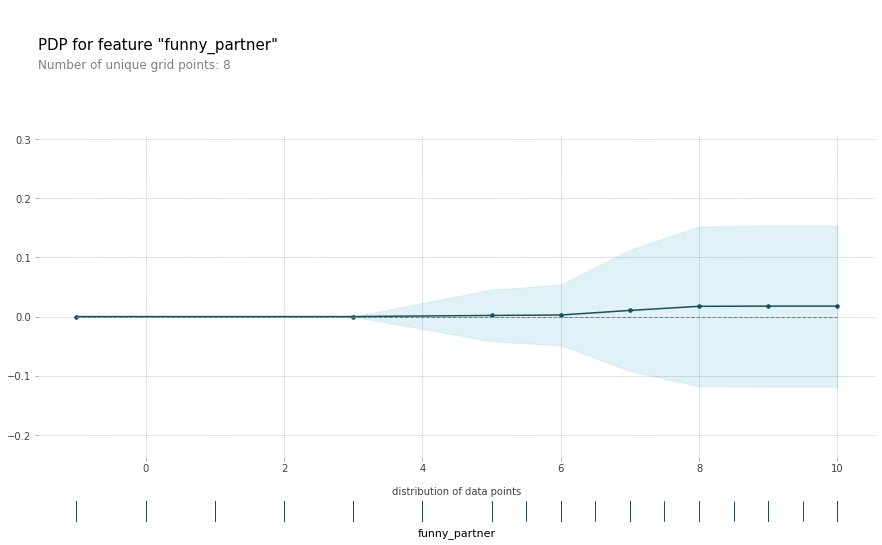

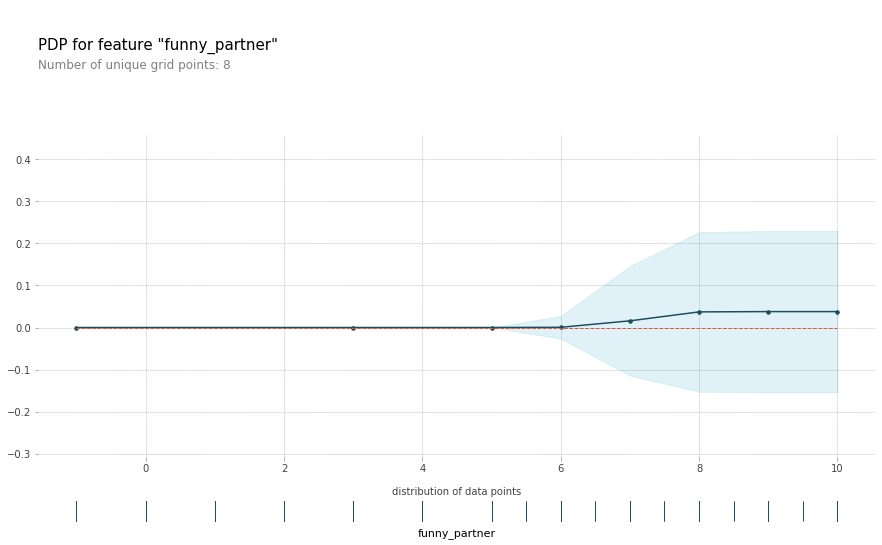

In [11]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='funny_partner', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'funny_partner', plot_pts_dist=True)

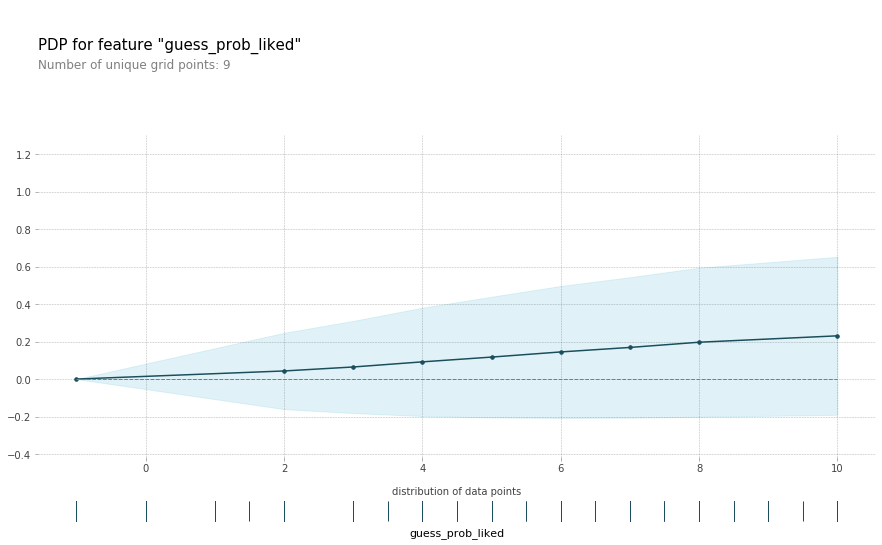

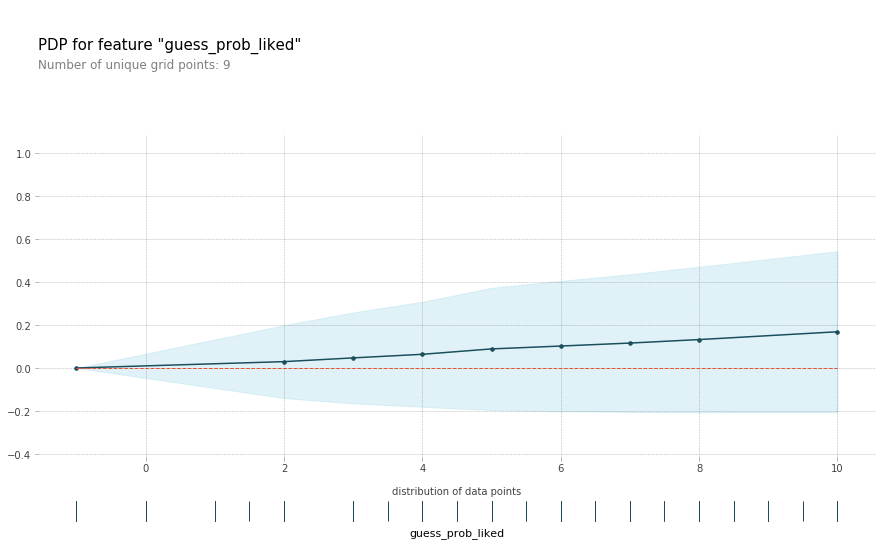

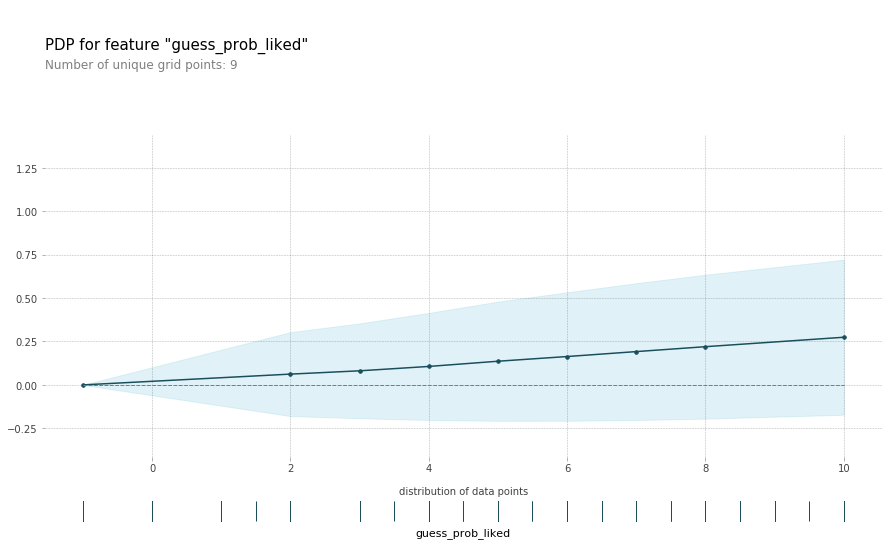

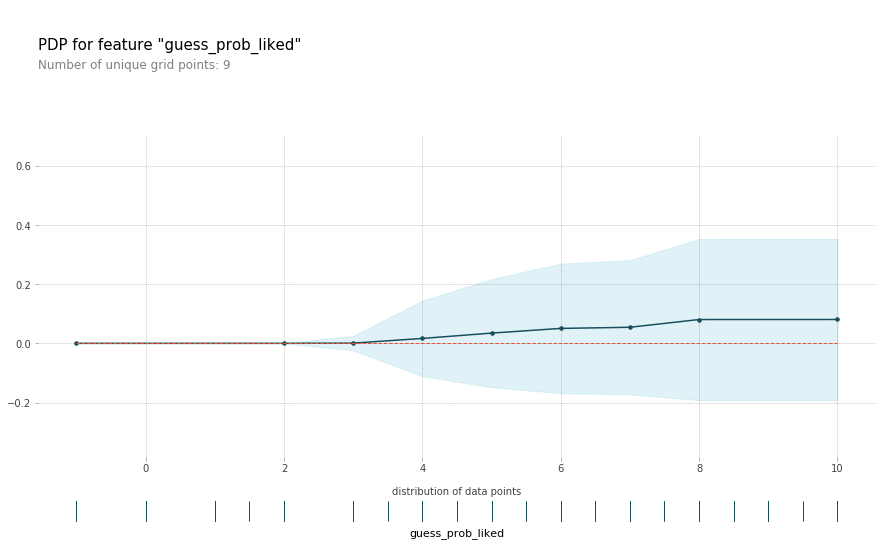

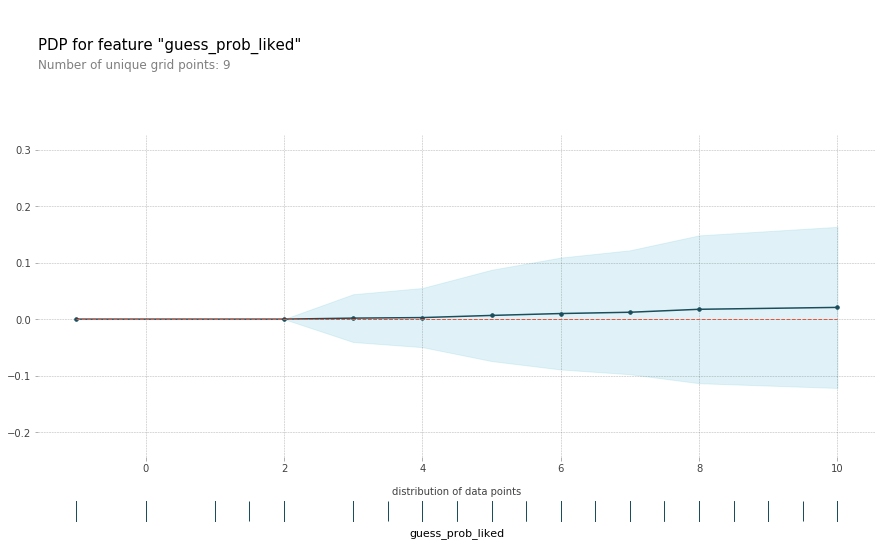

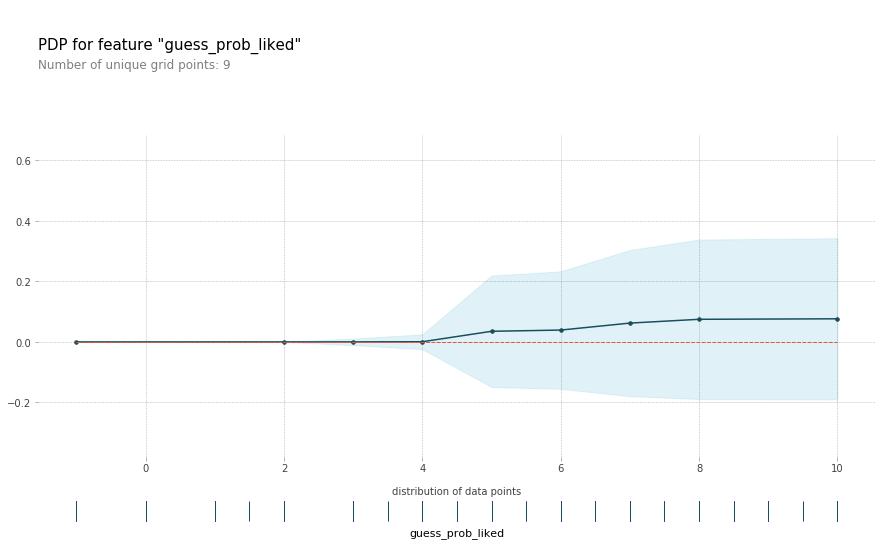

In [12]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='guess_prob_liked', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'guess_prob_liked', plot_pts_dist=True)

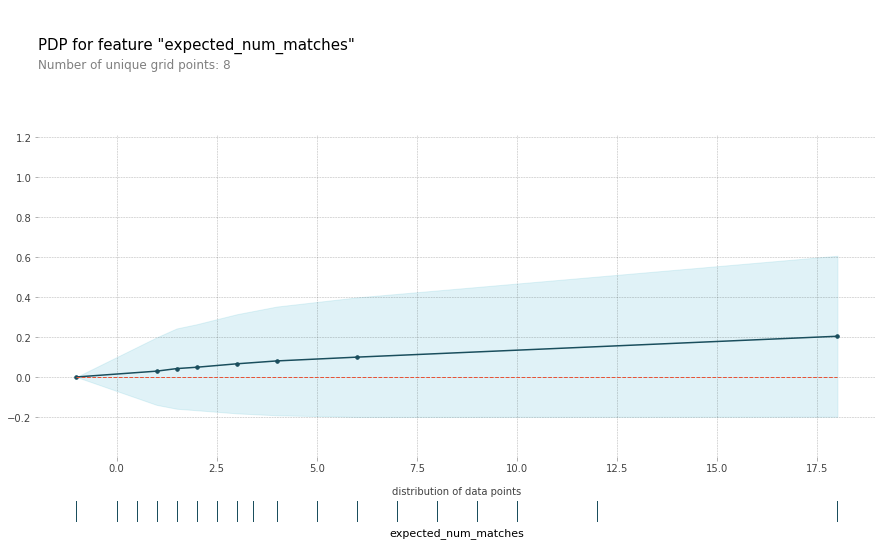

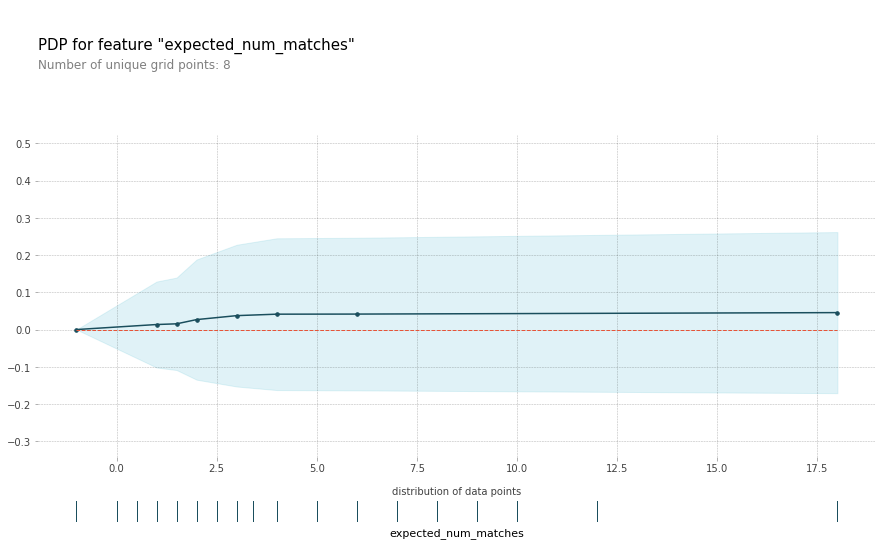

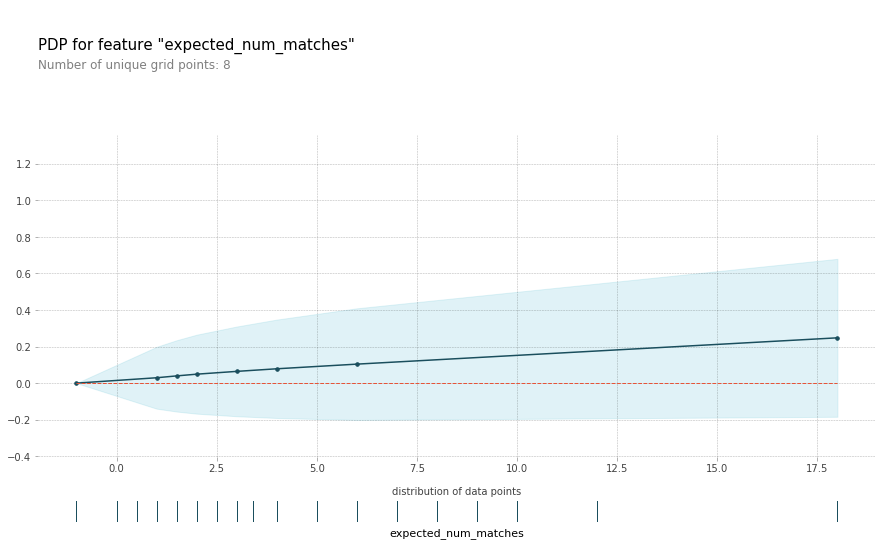

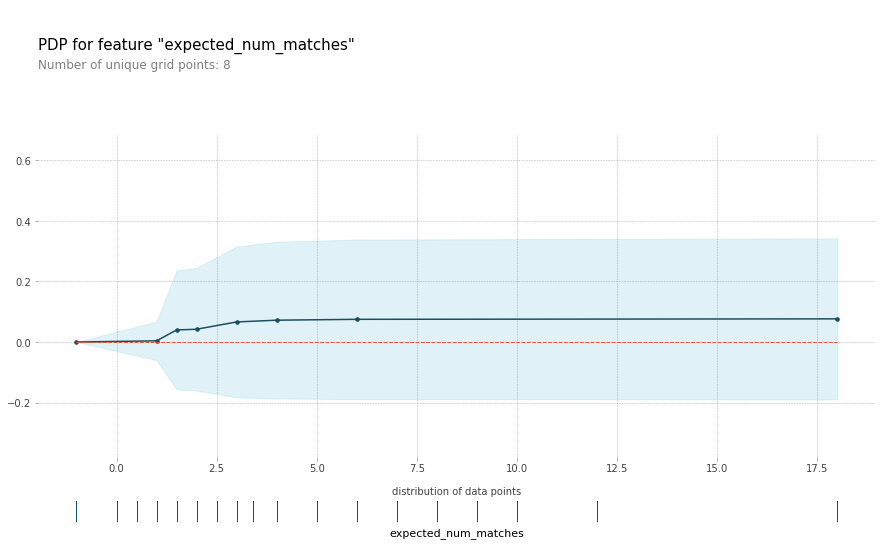

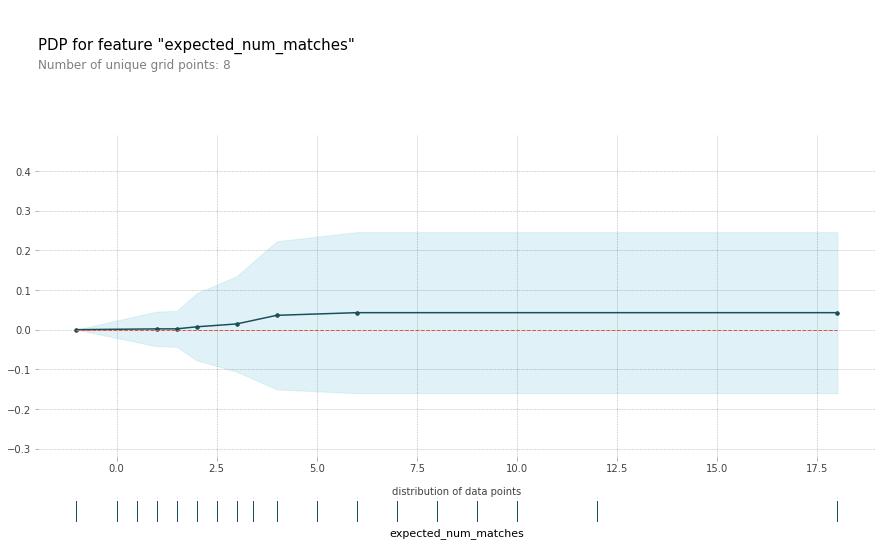

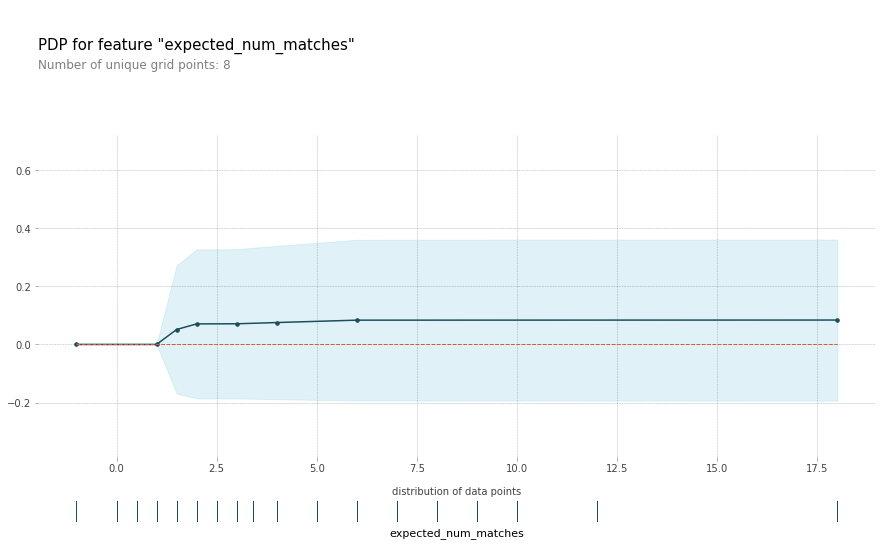

In [13]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='expected_num_matches', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'expected_num_matches', plot_pts_dist=True)

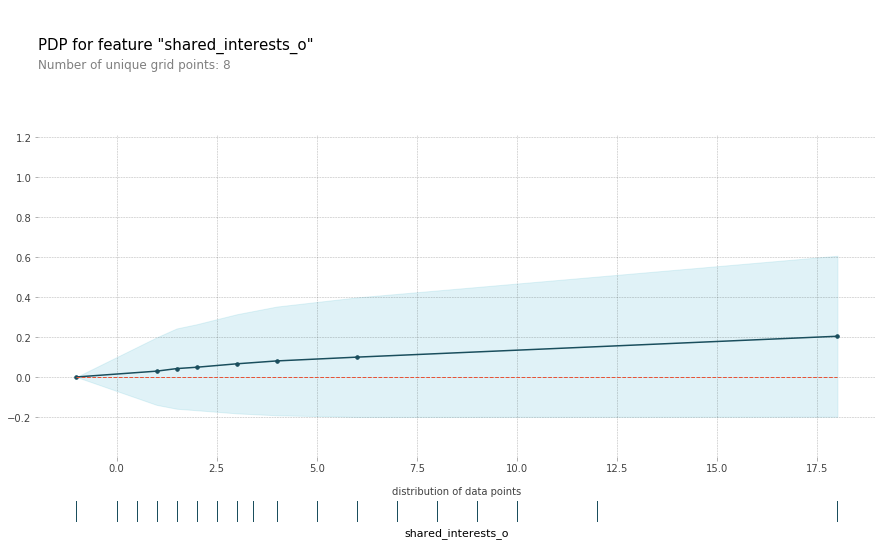

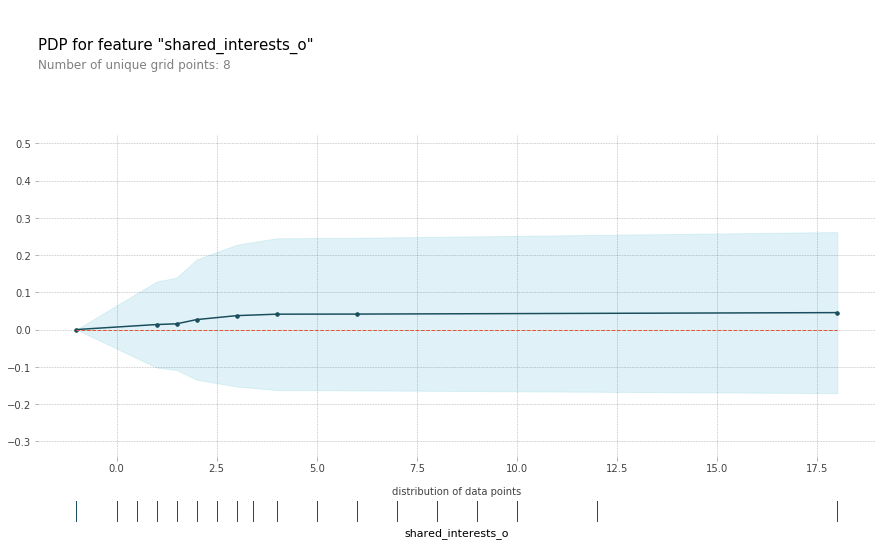

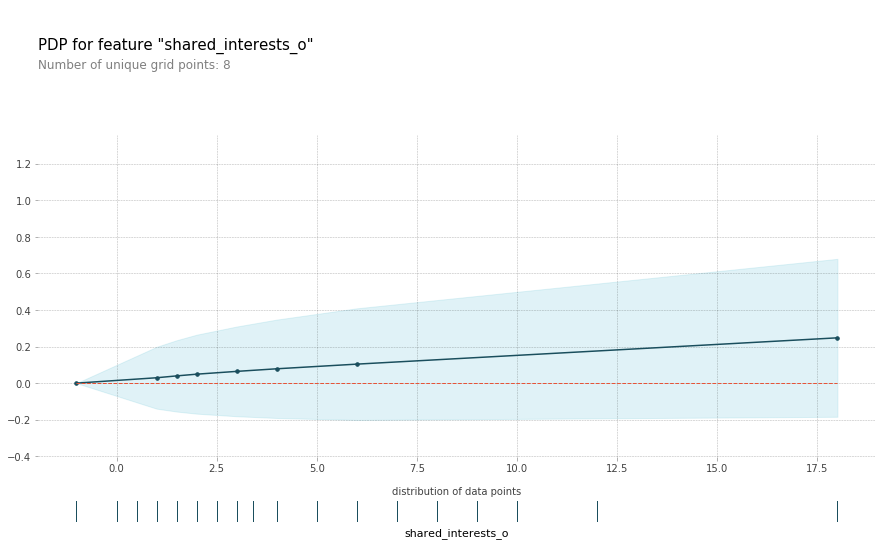

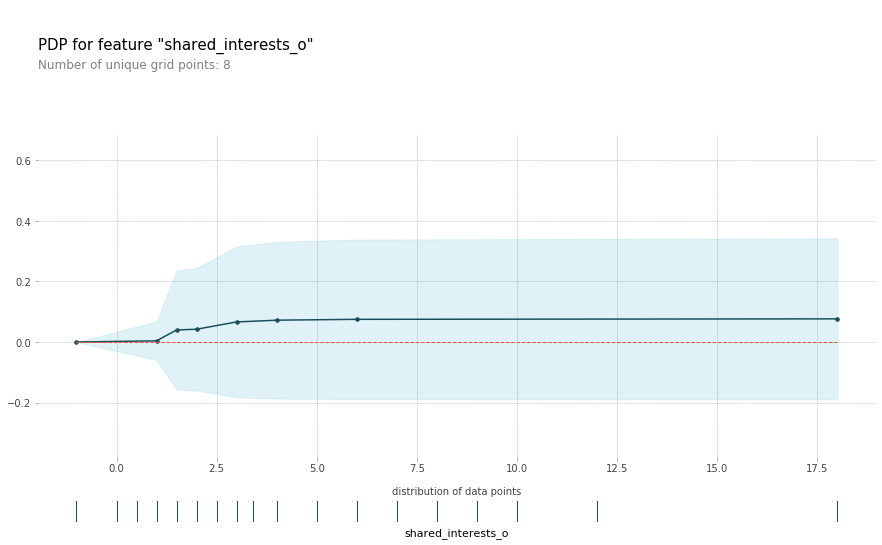

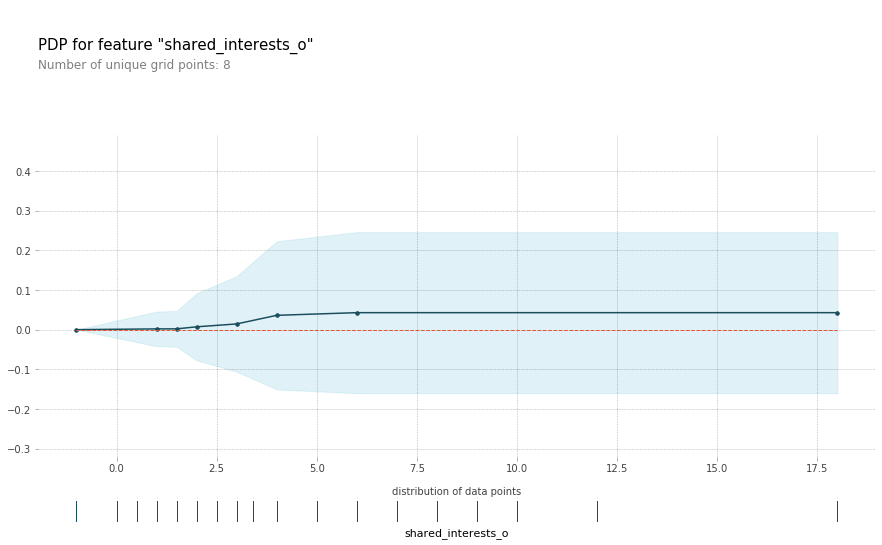

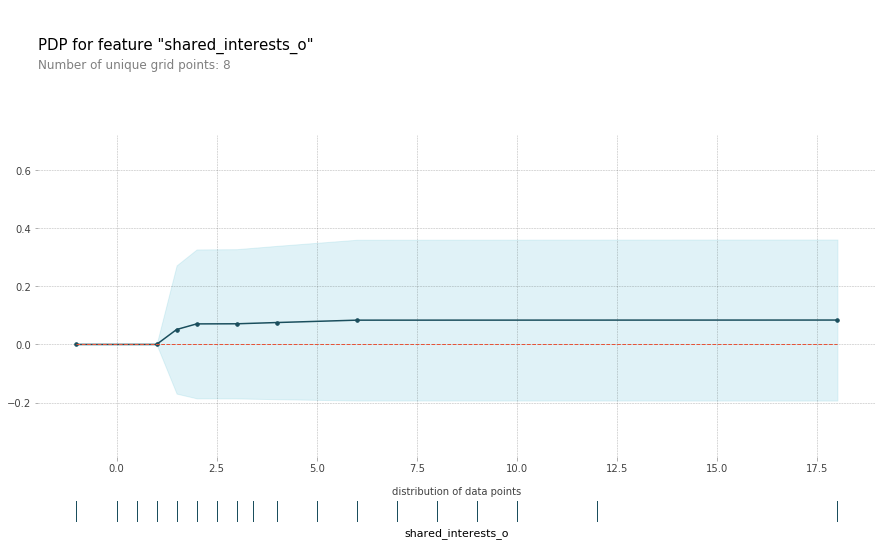

In [14]:
for model in models+bad_models:
    pdp_feat = pdp.pdp_isolate(
        model=model, dataset=X, model_features=numeric_conv_cols, feature='expected_num_matches', n_jobs=-1
    )
    fig, axes = pdp.pdp_plot(pdp_feat, 'shared_interests_o', plot_pts_dist=True)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


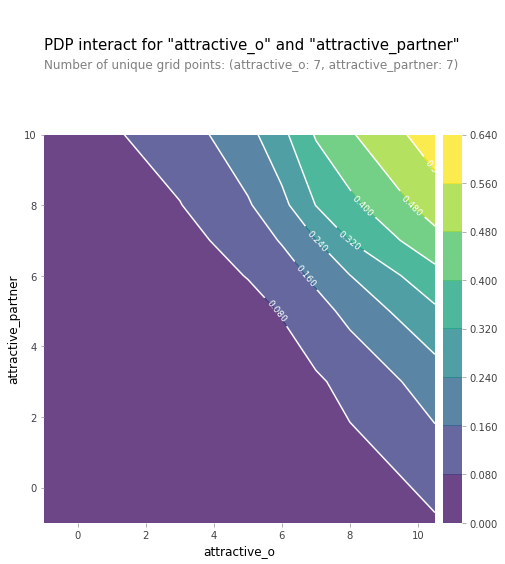

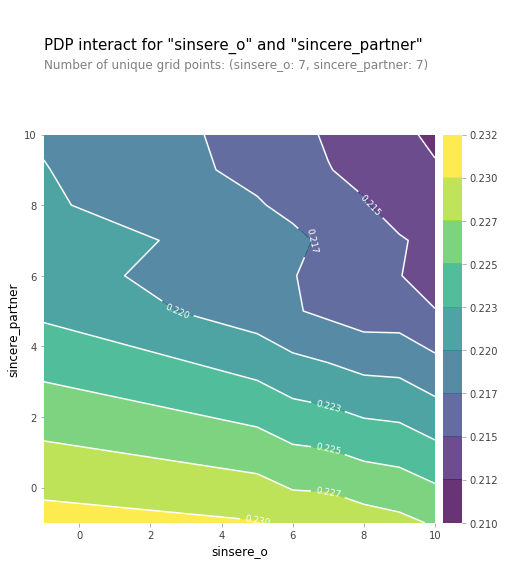

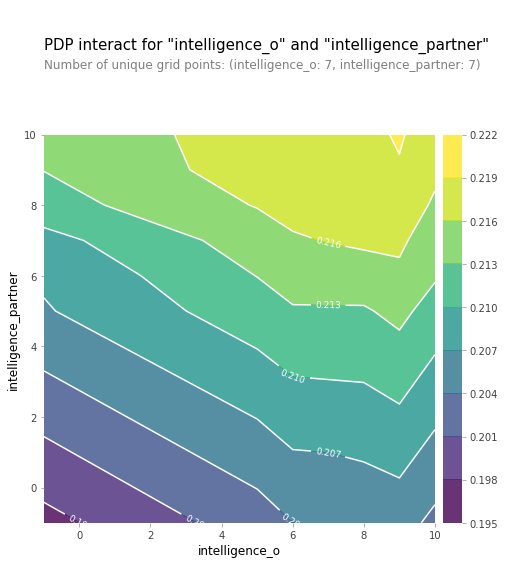

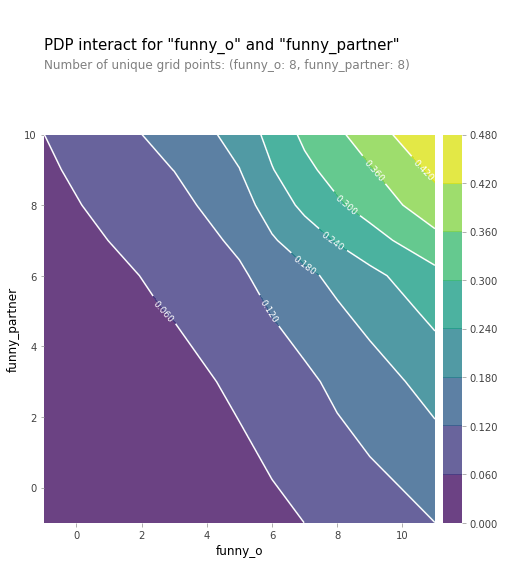

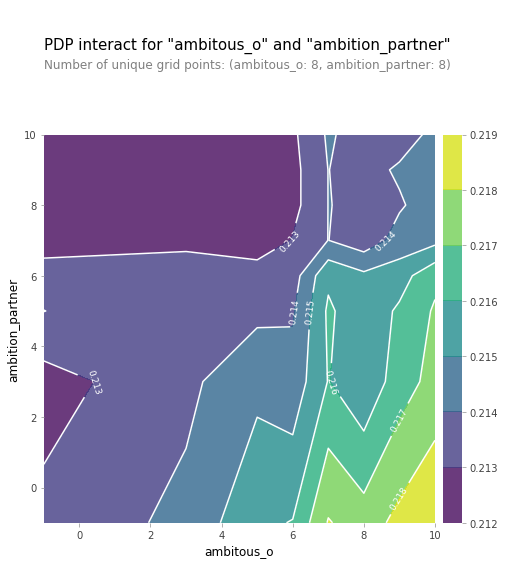

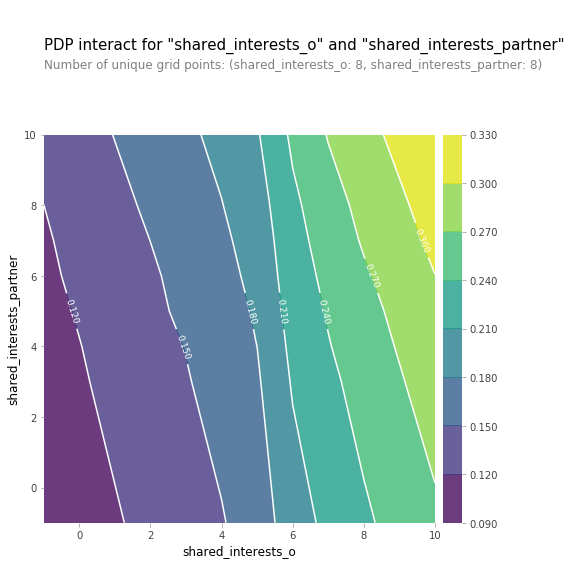

In [9]:
# --> https://github.com/SauceCat/PDPbox/issues/40
for feature_a, feature_b in zip(['attractive_o', 'sinsere_o','intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o'],
                               ['attractive_partner', 'sincere_partner','intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner']):
    pdp_feat = pdp.pdp_interact(
        model=models[0], dataset=X, model_features=numeric_conv_cols, features=[feature_a, feature_b]
    )
    fig, axes = pdp.pdp_interact_plot(
        pdp_interact_out=pdp_feat, feature_names=[feature_a, feature_b], plot_type='contour', plot_pdp=False
    )